In [1]:
import pandas as pd
import numpy as np

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
from wordcloud import WordCloud
import plotly.express as px
import plotly.graph_objects as go

In [3]:
%matplotlib inline
sns.set_style('whitegrid')

This is basic data analysis on covid-19 vaccination drive that is undergoing around the world. As world has been facing serious pandemic from many months, many countries have successfully developed effective vaccine against this pandemic. 

The data here is the record of the vaccination drive around the world. It is started from 2020-12-13 and captures the data up to 2021-03-10

In [4]:
df = pd.read_csv('country_vaccinations.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              5824 non-null   object 
 1   iso_code                             5476 non-null   object 
 2   date                                 5824 non-null   object 
 3   total_vaccinations                   3717 non-null   float64
 4   people_vaccinated                    3302 non-null   float64
 5   people_fully_vaccinated              2257 non-null   float64
 6   daily_vaccinations_raw               3131 non-null   float64
 7   daily_vaccinations                   5637 non-null   float64
 8   total_vaccinations_per_hundred       3717 non-null   float64
 9   people_vaccinated_per_hundred        3302 non-null   float64
 10  people_fully_vaccinated_per_hundred  2257 non-null   float64
 11  daily_vaccinations_per_million

In [6]:
df[['date']].tail()

,date
5819,2021-03-06
5820,2021-03-07
5821,2021-03-08
5822,2021-03-09
5823,2021-03-10


In [7]:
# This much null value is present in dataset
df.isna().sum()

country                                   0
iso_code                                348
date                                      0
total_vaccinations                     2107
people_vaccinated                      2522
people_fully_vaccinated                3567
daily_vaccinations_raw                 2693
daily_vaccinations                      187
total_vaccinations_per_hundred         2107
people_vaccinated_per_hundred          2522
people_fully_vaccinated_per_hundred    3567
daily_vaccinations_per_million          187
vaccines                                  0
source_name                               0
source_website                            0
dtype: int64

It may happen because not every country is started vaccination or not record is maintaning properly. It is also possible that the data we are using is incomplet or some other reasons. However, we have the data and anaysis will happen on it.

# Data Cleaning

### IN this section what we done primarly is-
    ## will replace null value with 0 assuming that there is no data available for that column or nothing has happend regarding that particular column.
    ## convert all the numeric values from object type to numeric type
    ## Convert date from object to datetime data type
    ## add three new column year, month, days
   

In [8]:
df.fillna(0, inplace=True)
df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Albania,ALB,2021-01-10,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
1,Albania,ALB,2021-01-11,0.0,0.0,0.0,0.0,64.0,0.00,0.00,0.0,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
2,Albania,ALB,2021-01-12,128.0,128.0,0.0,0.0,64.0,0.00,0.00,0.0,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
3,Albania,ALB,2021-01-13,188.0,188.0,0.0,60.0,63.0,0.01,0.01,0.0,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
4,Albania,ALB,2021-01-14,266.0,266.0,0.0,78.0,66.0,0.01,0.01,0.0,23.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              5824 non-null   object 
 1   iso_code                             5824 non-null   object 
 2   date                                 5824 non-null   object 
 3   total_vaccinations                   5824 non-null   float64
 4   people_vaccinated                    5824 non-null   float64
 5   people_fully_vaccinated              5824 non-null   float64
 6   daily_vaccinations_raw               5824 non-null   float64
 7   daily_vaccinations                   5824 non-null   float64
 8   total_vaccinations_per_hundred       5824 non-null   float64
 9   people_vaccinated_per_hundred        5824 non-null   float64
 10  people_fully_vaccinated_per_hundred  5824 non-null   float64
 11  daily_vaccinations_per_million

In [10]:
df.total_vaccinations = df.total_vaccinations.astype(int)
df.people_vaccinated = df.people_vaccinated.astype(int)
df.people_fully_vaccinated = df.people_fully_vaccinated.astype(int)
df.daily_vaccinations_raw = df.daily_vaccinations_raw.astype(int)
df.daily_vaccinations = df.daily_vaccinations.astype(int)
df.total_vaccinations_per_hundred = df.total_vaccinations_per_hundred.astype(int)
df.people_vaccinated_per_hundred = df.people_vaccinated_per_hundred.astype(int)
df.people_fully_vaccinated_per_hundred = df.people_fully_vaccinated_per_hundred.astype(int)
df.daily_vaccinations_per_million = df.daily_vaccinations_per_million.astype(int)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   country                              5824 non-null   object
 1   iso_code                             5824 non-null   object
 2   date                                 5824 non-null   object
 3   total_vaccinations                   5824 non-null   int64 
 4   people_vaccinated                    5824 non-null   int64 
 5   people_fully_vaccinated              5824 non-null   int64 
 6   daily_vaccinations_raw               5824 non-null   int64 
 7   daily_vaccinations                   5824 non-null   int64 
 8   total_vaccinations_per_hundred       5824 non-null   int64 
 9   people_vaccinated_per_hundred        5824 non-null   int64 
 10  people_fully_vaccinated_per_hundred  5824 non-null   int64 
 11  daily_vaccinations_per_million       5824 n

In [12]:
date = df.date.str.split('-', expand=True)
date

,0,1,2
0,2021,01,10
1,2021,01,11
2,2021,01,12
3,2021,01,13
4,2021,01,14
...,...,...,...
5819,2021,03,06
5820,2021,03,07
5821,2021,03,08
5822,2021,03,09


In [13]:
df['year'] = date[0]
df['month']=date[1]
df['day']=date[2]

df.year = df.year.astype(int)
df.month=df.month.astype(int)
df.day = pd.to_numeric(df.day)

In [14]:
df.date = pd.to_datetime(df.date)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   country                              5824 non-null   object        
 1   iso_code                             5824 non-null   object        
 2   date                                 5824 non-null   datetime64[ns]
 3   total_vaccinations                   5824 non-null   int64         
 4   people_vaccinated                    5824 non-null   int64         
 5   people_fully_vaccinated              5824 non-null   int64         
 6   daily_vaccinations_raw               5824 non-null   int64         
 7   daily_vaccinations                   5824 non-null   int64         
 8   total_vaccinations_per_hundred       5824 non-null   int64         
 9   people_vaccinated_per_hundred        5824 non-null   int64         
 10  people_fully

In [16]:
# Finally Some highlights of dataset
print('Number of countries participated in vaccinations: ',len(df.country.unique()))
print('Date at which the vaccination started',df.date.min())
print('Data points ends at the date: ',df.date.max())
print('Nunber of vaccines are in use: ',len(df.vaccines.unique()))

Number of countries participated in vaccinations:  130
Date at which the vaccination started 2020-12-13 00:00:00
Data points ends at the date:  2021-03-10 00:00:00
Nunber of vaccines are in use:  24


In [17]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
total_vaccinations,5824.0,1.336148e+06,5.840887e+06,0.0,0.0,26512.5,466527.50,95721290.0
people_vaccinated,5824.0,9.815566e+05,4.198054e+06,0.0,0.0,10690.0,294756.50,62451150.0
people_fully_vaccinated,5824.0,2.534459e+05,1.650972e+06,0.0,0.0,0.0,30394.75,32904161.0
daily_vaccinations_raw,5824.0,4.407231e+04,1.785066e+05,0.0,0.0,327.5,15335.75,2904229.0
daily_vaccinations,5824.0,5.634211e+04,1.850083e+05,0.0,1034.0,5921.0,27478.00,2169981.0
total_vaccinations_per_hundred,5824.0,5.057005e+00,1.286193e+01,0.0,0.0,0.0,4.00,133.0
people_vaccinated_per_hundred,5824.0,3.472184e+00,8.577710e+00,0.0,0.0,0.0,3.00,85.0
people_fully_vaccinated_per_hundred,5824.0,9.344093e-01,4.143049e+00,0.0,0.0,0.0,0.00,47.0
daily_vaccinations_per_million,5824.0,2.460897e+03,4.297707e+03,0.0,310.0,1127.0,2561.50,54264.0
year,5824.0,2.020943e+03,2.318730e-01,2020.0,2021.0,2021.0,2021.00,2021.0


In [18]:
df.country.unique()

array(['Albania', 'Algeria', 'Andorra', 'Anguilla', 'Argentina',
       'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Bermuda', 'Bolivia',
       'Brazil', 'Bulgaria', 'Cambodia', 'Canada', 'Cayman Islands',
       'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Cyprus',
       'Czechia', 'Denmark', 'Dominica', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'England', 'Estonia', 'Faeroe Islands',
       'Falkland Islands', 'Finland', 'France', 'Germany', 'Ghana',
       'Gibraltar', 'Greece', 'Greenland', 'Grenada', 'Guatemala',
       'Guernsey', 'Guyana', 'Honduras', 'Hong Kong', 'Hungary',
       'Iceland', 'India', 'Indonesia', 'Iran', 'Ireland', 'Isle of Man',
       'Israel', 'Italy', 'Japan', 'Jersey', 'Jordan', 'Kazakhstan',
       'Kuwait', 'Latvia', 'Lebanon', 'Liechtenstein', 'Lithuania',
       'Luxembourg', 'Macao', 'Malaysia', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'M

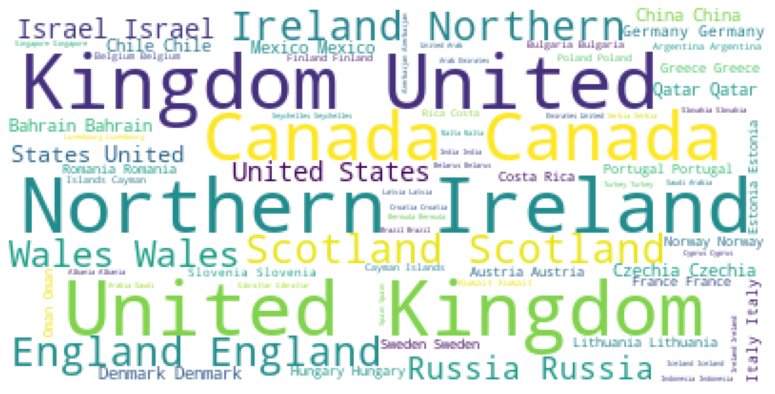

In [24]:
wordCloud = WordCloud(background_color='white',max_font_size=50).generate(' '.join(df.country))
plt.figure(figsize=(15,7))
plt.axis('off')
plt.imshow(wordCloud)
plt.show()

# Total Vaccination Till 12-March 2021

In [30]:
country_wise_total_vaccinated = {}
for country in df.country.unique():
    vaccinated = 0
    for i in range(len(df)):
        if df.country[i]==country:
            vaccinated += df.daily_vaccinations[i]
    country_wise_total_vaccinated[country]=vaccinated
country_wise_total_vaccinated_df = pd.DataFrame.from_dict(country_wise_total_vaccinated, orient='index',
                                               columns=['total_vaccinated_till_date'])
country_wise_total_vaccinated_df.sort_values(by='total_vaccinated_till_date',ascending=False, inplace=True)
country_wise_total_vaccinated_df

,total_vaccinated_till_date
United States,89468175
China,49687760
United Kingdom,23297315
India,22256015
England,19639663
...,...
Montserrat,645
Trinidad and Tobago,441
Grenada,145
Honduras,0


In [34]:
fig = px.bar(country_wise_total_vaccinated_df,
            y='total_vaccinated_till_date',
            x=country_wise_total_vaccinated_df.index,
            color='total_vaccinated_till_date',
            color_discrete_sequence=px.colors.sequential.Viridis_r
            )
fig.update_layout(
    title={
        'text':'Vaccination till date in various countries',
        'y':0.95,
        'x':0.5
    },
    xaxis_title='Countries',
    yaxis_title='Total Vaccinated',
    legend_title='Total Vaccinated'
)
fig.show()

# From the plot Top list of in total vaccinated people country
## US
## China
## UK
## India

In [37]:
# Countrywise daily vaccination
fig = px.line(df, x='date', y='daily_vaccinations',color='country')
fig.update_layout(
    title={
        'text':'Daily Vaccination trend',
        'y':0.95,
        'x':0.5
    },
    xaxis_title='Date',
    yaxis_title='Daily Vaccinations'
)
fig.show()

In [42]:
def plot_till_date(value1, value2, title, color1, color2):
    so_far_dict = {}
    
    for dates in df.date.unique():
        so_far_dict[dates],value1_count,value2_count=[],0,0
        
        for i in range(len(df)):
            if df.date[i]==dates:
                value1_count+=df[value1][i]
                value2_count+=df[value2][i]
        so_far_dict[dates].append(value1_count)
        so_far_dict[dates].append(value2_count)
    so_far_df = pd.DataFrame.from_dict(so_far_dict, orient='index',columns=[value1, value2])
    so_far_df.reset_index(inplace=True)
    
    so_far_df.sort_values(by='index',inplace=True)
    plot = go.Figure(data=[go.Scatter(
        x = so_far_df['index'],
        y = so_far_df[value1],
        stackgroup='one',
        name = value1,
        marker_color=color1
    ),
                          
        go.Scatter(
        x = so_far_df['index'],
        y = so_far_df[value2],
            stackgroup = 'one',
            name=value2,
            marker_color=color2
        )])
    
    plot.update_layout(
        title={
            'text':title,
            'y': 0.95,
            'x':0.5
        },
        xaxis_title='Date'
    )
    display(so_far_df.head(5))
    return plot.show()

In [43]:
plot_till_date('people_fully_vaccinated','people_vaccinated','People vaccinated vs fully vaccinated till date',
              '#c4eb28','#35eb28')

,index,people_fully_vaccinated,people_vaccinated
87,2020-12-13,0,172930
78,2020-12-14,0,0
79,2020-12-15,0,28500
80,2020-12-16,0,0
81,2020-12-17,0,0


In [44]:
plot_till_date('people_fully_vaccinated_per_hundred','people_vaccinated_per_hundred',
               'People vaccinated vs fully vaccinated per hundred till date','#0938e3','#7127cc')

,index,people_fully_vaccinated_per_hundred,people_vaccinated_per_hundred
87,2020-12-13,0,0
78,2020-12-14,0,0
79,2020-12-15,0,0
80,2020-12-16,0,0
81,2020-12-17,0,0


In [48]:
# Pie Plot
def plot_pie(value, title, color):
    new_dict = {}
    for v in df[value].unique():
        value_count=0
        for i in range(len(df)):
            if df[value][i]==v:
                value_count+=1
        new_dict[v]=value_count
    print(new_dict)
    new_df = pd.DataFrame.from_dict(new_dict, orient='index',columns=['Total'])
    
    if color=='plasma':
        fig = px.pie(new_df, values='Total',
                    names = new_df.index,
                    title = title,
                    color_discrete_sequence=px.colors.sequential.Plasma)
    elif color=='rainbow':
        fig = px.pie(new_df, values='Total',
                    names = new_df.index,
                    title = title,
                    color_discrete_sequence=px.colors.sequential.Rainbow)
    else:
        fig = px.pie(new_df, values='Total',
                    names=new_df.index,
                    title=title)
    fig.update_layout(
        title={
            'x':0.5,
            'y':0.95
        },
        legend_title = value
    )
    return fig.show()

# most used vaccine

In [46]:
df.vaccines.unique()

array(['Pfizer/BioNTech', 'Sputnik V', 'Oxford/AstraZeneca',
       'Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V',
       'Oxford/AstraZeneca, Pfizer/BioNTech',
       'Moderna, Oxford/AstraZeneca, Pfizer/BioNTech', 'Sinovac',
       'Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V',
       'Oxford/AstraZeneca, Sinovac', 'Sinopharm/Beijing',
       'Moderna, Pfizer/BioNTech', 'Pfizer/BioNTech, Sinovac',
       'Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac', 'Moderna',
       'Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V',
       'Covaxin, Oxford/AstraZeneca',
       'Pfizer/BioNTech, Sinopharm/Beijing',
       'Oxford/AstraZeneca, Pfizer/BioNTech, Sputnik V',
       'Sinopharm/Beijing, Sputnik V',
       'Oxford/AstraZeneca, Sinopharm/Beijing', 'EpiVacCorona, Sputnik V',
       'Johnson&Johnson',
       'Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sinopharm/Wuhan, Sputnik V',
       'Johnson&Johnson, Moderna, Pfizer/BioNTe

In [49]:
plot_pie('vaccines','Various vaccines and their uses','plasma')

{'Pfizer/BioNTech': 1095, 'Sputnik V': 197, 'Oxford/AstraZeneca': 400, 'Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V': 92, 'Oxford/AstraZeneca, Pfizer/BioNTech': 842, 'Moderna, Oxford/AstraZeneca, Pfizer/BioNTech': 1508, 'Sinovac': 193, 'Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V': 140, 'Oxford/AstraZeneca, Sinovac': 54, 'Sinopharm/Beijing': 114, 'Moderna, Pfizer/BioNTech': 358, 'Pfizer/BioNTech, Sinovac': 126, 'Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac': 76, 'Moderna': 6, 'Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V': 73, 'Covaxin, Oxford/AstraZeneca': 55, 'Pfizer/BioNTech, Sinopharm/Beijing': 45, 'Oxford/AstraZeneca, Pfizer/BioNTech, Sputnik V': 77, 'Sinopharm/Beijing, Sputnik V': 17, 'Oxford/AstraZeneca, Sinopharm/Beijing': 102, 'EpiVacCorona, Sputnik V': 86, 'Johnson&Johnson': 23, 'Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sinopharm/Wuhan, Sputnik V': 64, 'Johnson&Johnson, Moderna, Pfizer/BioNTech': 81}


In [51]:
plot_pie('source_name','Sources','plasma')

{'Ministry of Health': 1791, 'Government of Andorra': 33, 'Government of Australia via covidlive.com.au': 24, 'Government of Azerbaijan': 53, 'Directorate General of Health Services': 43, 'Sciensano': 72, 'Government of Bermuda': 53, 'Regional governments via Coronavirus Brasil': 54, 'Official data from provinces via covid19tracker.ca': 87, 'Cayman Islands Government': 70, 'Department of Statistics and Health Information': 77, 'National Health Commission': 148, 'Government of Cyprus': 59, 'Statens Serum Institut': 74, 'Government of Dominica': 19, 'Ministry of Public Health': 24, 'Government of Ecuador via Ecuacovid': 48, 'Government of the United Kingdom': 435, 'National Health Board': 73, 'Government of the Faeroe Islands': 39, 'Government of the Falkland Islands': 16, 'Finnish Institute for Health and Welfare': 70, 'Public Health France': 73, 'Robert Koch Institut': 74, 'Government of Ghana': 10, 'Government of Gibraltar': 60, 'Government of Greenland': 34, 'Government of Grenada': 